In [48]:
# 加载数据分析常用库
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
#画图前的文字、颜色等设置
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #显示负号
#plt.rcParams['figure.dpi'] = 200  # 图像分辨率
#plt.rcParams['text.color'] = 'black'  # 文字颜色
#plt.style.use('ggplot')
#print(plt.style.available)  # 可选的plt绘图风格

In [49]:
#输出高清图像
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [50]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model


### 1、导入数据，数据预处理

In [115]:
dataframe = pd.read_csv(r'C:\Users\lmr18\Desktop\canada.csv',encoding='gbk', usecols=[4], engine='python', skipfooter=3)

#### 划分训练集测试集

In [116]:
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')

train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [117]:
trainlist

array([[37666.],
       [37699.],
       [37716.],
       [37729.],
       [37772.],
       [37847.],
       [37904.],
       [37914.],
       [37997.],
       [38012.],
       [38015.],
       [38019.],
       [38159.],
       [38289.],
       [38329.],
       [38368.],
       [38390.],
       [38403.],
       [38428.],
       [38533.],
       [38654.],
       [38749.],
       [38807.],
       [38833.],
       [38848.],
       [38894.],
       [39008.],
       [39145.],
       [39229.],
       [39265.],
       [39288.],
       [39293.],
       [39337.],
       [39483.],
       [39642.],
       [39717.],
       [39772.],
       [39784.],
       [39788.],
       [39843.],
       [39978.],
       [40133.],
       [40218.],
       [40249.],
       [40259.],
       [40266.],
       [40291.],
       [40388.],
       [40583.],
       [40665.],
       [40689.],
       [40696.],
       [40698.],
       [40702.],
       [40795.],
       [40918.],
       [40968.],
       [40992.],
       [40995.

In [118]:
#train=trainlist['日确诊'].values.reshape(-1,1)
#train = train.astype('float32')

In [119]:
#test=testlist['日确诊'].values.reshape(-1,1)
#test =test.astype('float32')

In [120]:
# dataframe = pd.read_csv(r'C:\Users\lmr18\Desktop\数据.csv',encoding='gbk',usecols=[1], engine='python', skipfooter=3)
# ##,usecols=[1], engine='python', skipfooter=3

# dataset = dataframe.values
# # 将整型变为float
# dataset = dataset.astype('float32')
# #归一化 在下一步会讲解
# scaler = MinMaxScaler(feature_range=(0, 1))
# dataset = scaler.fit_transform(dataset)

# train_size = int(len(dataset) * 0.7)
# trainlist = dataset[:train_size]
# testlist = dataset[train_size:]


#### 数据处理（标准化）

In [121]:
#标准化处理下
scaler = MinMaxScaler(feature_range=(0, 1))
trainlist = scaler.fit_transform(trainlist)
testlist = scaler.fit_transform(testlist)

In [122]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)


In [123]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

### 2、搭建模型

In [124]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions


Epoch 1/100
226/226 - 20s - loss: 0.2414 - 20s/epoch - 86ms/step
Epoch 2/100
226/226 - 1s - loss: 0.0816 - 1s/epoch - 4ms/step
Epoch 3/100
226/226 - 1s - loss: 0.0518 - 915ms/epoch - 4ms/step
Epoch 4/100
226/226 - 1s - loss: 0.0427 - 865ms/epoch - 4ms/step
Epoch 5/100
226/226 - 2s - loss: 0.0339 - 2s/epoch - 9ms/step
Epoch 6/100
226/226 - 2s - loss: 0.0254 - 2s/epoch - 8ms/step
Epoch 7/100
226/226 - 1s - loss: 0.0170 - 923ms/epoch - 4ms/step
Epoch 8/100
226/226 - 1s - loss: 0.0095 - 786ms/epoch - 3ms/step
Epoch 9/100
226/226 - 1s - loss: 0.0036 - 1s/epoch - 5ms/step
Epoch 10/100
226/226 - 1s - loss: 4.4851e-04 - 763ms/epoch - 3ms/step
Epoch 11/100
226/226 - 1s - loss: 1.7395e-04 - 774ms/epoch - 3ms/step
Epoch 12/100
226/226 - 1s - loss: 1.4596e-04 - 767ms/epoch - 3ms/step
Epoch 13/100
226/226 - 1s - loss: 1.2194e-04 - 821ms/epoch - 4ms/step
Epoch 14/100
226/226 - 1s - loss: 1.0634e-04 - 1s/epoch - 4ms/step
Epoch 15/100
226/226 - 1s - loss: 9.3885e-05 - 952ms/epoch - 4ms/step
Epoch 16/1

In [125]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)


4/4 [==============================] - 0s 10ms/step


In [126]:
plt.rcParams['font.sans-serif'] = ['SimHei']

In [127]:
# %config InlineBackend.figure_format ='retina'
# %matplotlib inline

### 3、绘制拟合图像

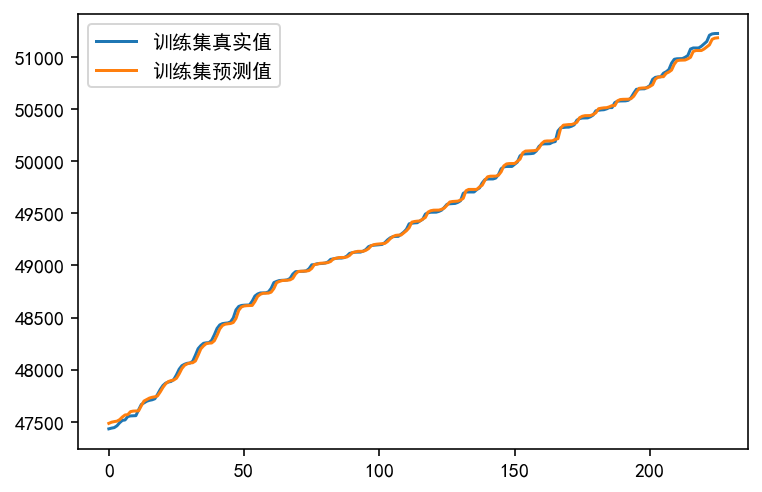

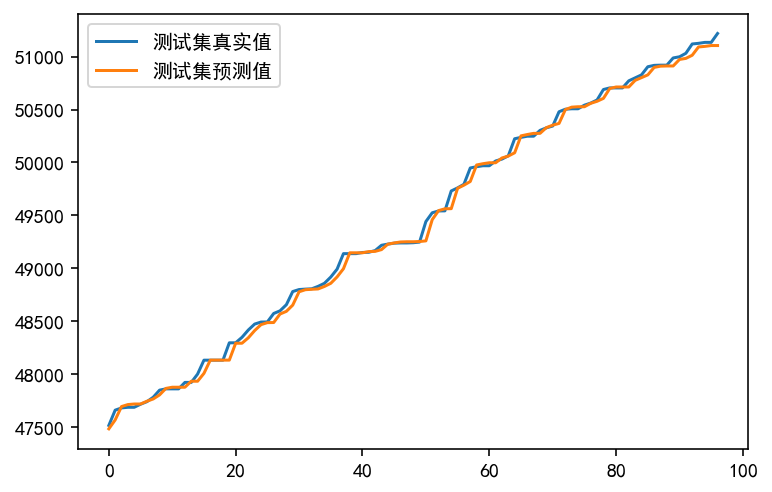

In [128]:
plt.plot(trainY,label='训练集真实值')
plt.plot(trainPredict,label='训练集预测值')
plt.legend()
plt.show()
#plt.savefig('1.png',dpi=750,bbox_inches='tight')
plt.plot(testY,label='测试集真实值')
plt.plot(testPredict,label='测试集预测值')
plt.legend()
plt.show()
#plt.savefig('2.png',dpi=750,bbox_inches='tight')

In [129]:
testPredict

array([[47484.605],
       [47568.457],
       [47694.93 ],
       [47713.684],
       [47719.055],
       [47719.055],
       [47745.11 ],
       [47766.78 ],
       [47804.934],
       [47866.4  ],
       [47877.48 ],
       [47877.48 ],
       [47877.48 ],
       [47934.17 ],
       [47934.17 ],
       [48008.41 ],
       [48133.434],
       [48133.434],
       [48133.434],
       [48133.434],
       [48293.004],
       [48293.004],
       [48344.234],
       [48412.64 ],
       [48468.484],
       [48487.5  ],
       [48488.5  ],
       [48568.89 ],
       [48594.11 ],
       [48652.805],
       [48779.008],
       [48798.418],
       [48802.504],
       [48805.574],
       [48829.105],
       [48858.81 ],
       [48919.35 ],
       [48996.484],
       [49147.023],
       [49147.023],
       [49147.023],
       [49158.38 ],
       [49160.44 ],
       [49176.96 ],
       [49228.594],
       [49239.953],
       [49249.246],
       [49251.31 ],
       [49251.31 ],
       [49253.38 ],


In [130]:
testY1 = scaler.fit_transform(testY)
testPredict1=scaler.fit_transform(testPredict)

### 4、模型评估

In [131]:
import math
import numpy as np

In [132]:
from sklearn.metrics import r2_score

In [133]:
# predMAPE = np.mean(np.abs(testY[0]-testPredict[:,0])/testY[0])
# print('predY MAPE: %.8f %% MAPE' % (predMAPE*100))

In [134]:
# calculate MSE 均方误差
mse=mean_squared_error(testY1,testPredict1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(testY1,testPredict1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(testY1,testPredict1)
# 平均绝对百分比误差
mape= np.mean(np.abs(testY1[1,:]-testPredict1[1,:])/testY1[1,:])
#calculate R square
r_square=r2_score(testY,testPredict)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('平均绝对百分比误差MAPE: %.6f' % mape)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.000377
均方根误差RMSE: 0.019423
平均绝对误差MAE: 0.017149
平均绝对百分比误差MAPE: 0.404618
R_square: 0.997409


In [139]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# from sklearn.metrics import roc_auc_score
# import numpy as np
# import warnings
# warnings.filterwarnings("ignore")

In [141]:
# parameters =  {'batch_size' : [1,5,10,16,20],
#             'epochs' : [8,10,20,50,100],
#             'optimizer' : ['adam','Adadelta','SGD']}
# grid_search = GridSearchCV(model,
#                           param_grid = parameters,
#                           scoring='accuracy',cv=5)
# grid_search.fit(trainY,trainPredict)

# print('最优参数组合:', grid_search.best_params_)
# print('最优模型:', grid_search.best_estimator_)
# # Mean cross-validated score of the best_estimator
# print('训练验证集上交叉验证的得分:', grid_search.best_score_)  ##值为何不同？
# # Evaluate a score by cross-validation
# scores = cross_val_score(grid_search, trainY,trainPredict , scoring='accuracy',cv=5)
# print('训练验证集上交叉验证的得分:',scores.mean()) ##值为何不同？
# print('测试集上的得分:', grid_search.score(testY,testPredict))

### 5、Adam优化

In [97]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [98]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))

Epoch 1/100
226/226 - 10s - loss: 0.1611 - accuracy: 0.0000e+00 - 10s/epoch - 46ms/step
Epoch 2/100
226/226 - 1s - loss: 0.0431 - accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 3/100
226/226 - 1s - loss: 0.0287 - accuracy: 0.0000e+00 - 976ms/epoch - 4ms/step
Epoch 4/100
226/226 - 1s - loss: 0.0179 - accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 5/100
226/226 - 1s - loss: 0.0088 - accuracy: 0.0000e+00 - 884ms/epoch - 4ms/step
Epoch 6/100
226/226 - 1s - loss: 0.0025 - accuracy: 0.0000e+00 - 804ms/epoch - 4ms/step
Epoch 7/100
226/226 - 1s - loss: 1.7390e-04 - accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 8/100
226/226 - 1s - loss: 6.7311e-05 - accuracy: 0.0000e+00 - 758ms/epoch - 3ms/step
Epoch 9/100
226/226 - 1s - loss: 6.1974e-05 - accuracy: 0.0000e+00 - 663ms/epoch - 3ms/step
Epoch 10/100
226/226 - 1s - loss: 5.8950e-05 - accuracy: 0.0000e+00 - 706ms/epoch - 3ms/step
Epoch 11/100
226/226 - 1s - loss: 5.8430e-05 - accuracy: 0.0000e+00 - 710ms/epoch - 3ms/step
Epoch 12/100
226/22

Epoch 90/100
226/226 - 1s - loss: 5.1720e-05 - accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 91/100
226/226 - 1s - loss: 5.3359e-05 - accuracy: 0.0000e+00 - 639ms/epoch - 3ms/step
Epoch 92/100
226/226 - 1s - loss: 5.3203e-05 - accuracy: 0.0000e+00 - 688ms/epoch - 3ms/step
Epoch 93/100
226/226 - 1s - loss: 5.1846e-05 - accuracy: 0.0000e+00 - 566ms/epoch - 3ms/step
Epoch 94/100
226/226 - 1s - loss: 5.2135e-05 - accuracy: 0.0000e+00 - 601ms/epoch - 3ms/step
Epoch 95/100
226/226 - 1s - loss: 5.3203e-05 - accuracy: 0.0000e+00 - 530ms/epoch - 2ms/step
Epoch 96/100
226/226 - 1s - loss: 5.6546e-05 - accuracy: 0.0000e+00 - 568ms/epoch - 3ms/step
Epoch 97/100
226/226 - 1s - loss: 5.0247e-05 - accuracy: 0.0000e+00 - 604ms/epoch - 3ms/step
Epoch 98/100
226/226 - 1s - loss: 5.3973e-05 - accuracy: 0.0000e+00 - 598ms/epoch - 3ms/step
Epoch 99/100
226/226 - 1s - loss: 5.1363e-05 - accuracy: 0.0000e+00 - 652ms/epoch - 3ms/step
Epoch 100/100
226/226 - 1s - loss: 5.4573e-05 - accuracy: 0.0000e+00 - 56

In [99]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

4/4 [==============================] - 0s 3ms/step


In [100]:
trainPredict

array([[47537.105],
       [47548.094],
       [47553.77 ],
       [47558.11 ],
       [47572.508],
       [47597.727],
       [47616.99 ],
       [47620.375],
       [47648.586],
       [47653.703],
       [47654.727],
       [47656.094],
       [47704.13 ],
       [47749.145],
       [47763.074],
       [47776.69 ],
       [47784.387],
       [47788.938],
       [47797.703],
       [47834.67 ],
       [47877.562],
       [47911.45 ],
       [47932.23 ],
       [47941.57 ],
       [47946.96 ],
       [47963.53 ],
       [48004.758],
       [48054.63 ],
       [48085.375],
       [48098.59 ],
       [48107.043],
       [48108.88 ],
       [48125.082],
       [48179.08 ],
       [48238.26 ],
       [48266.31 ],
       [48286.93 ],
       [48291.438],
       [48292.938],
       [48313.613],
       [48364.54 ],
       [48423.293],
       [48455.633],
       [48467.453],
       [48471.266],
       [48473.934],
       [48483.477],
       [48520.562],
       [48595.4  ],
       [48626.973],


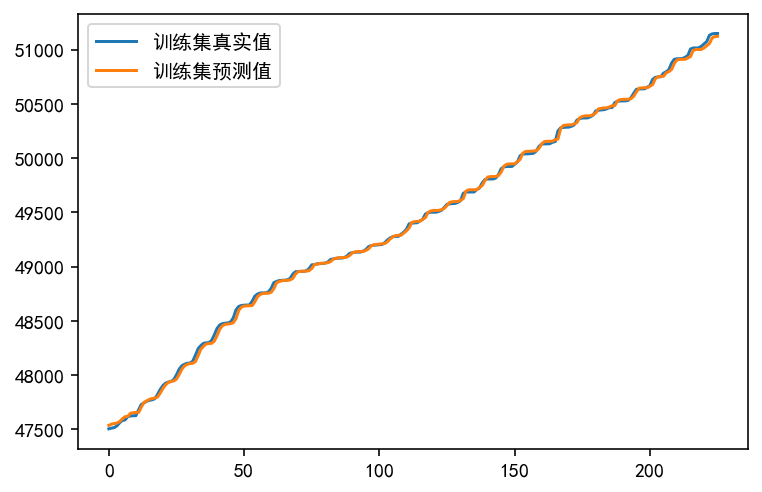

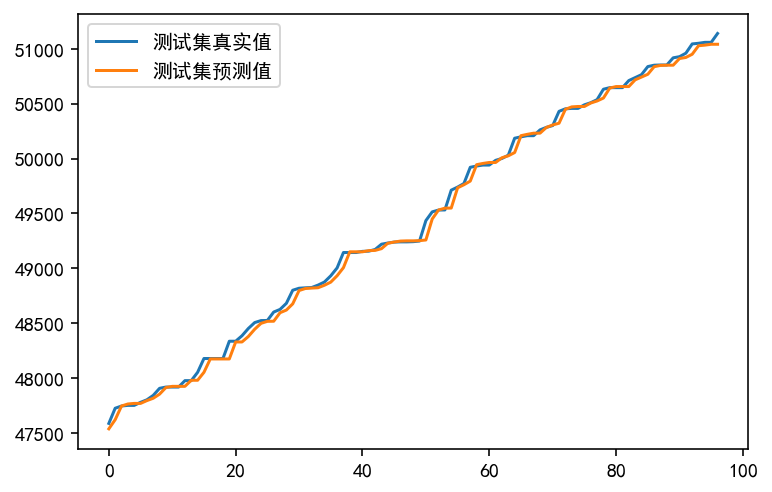

In [101]:
plt.plot(trainY,label='训练集真实值')
plt.plot(trainPredict,label='训练集预测值')
plt.legend()
plt.show()
#plt.savefig('11.png',dpi=750,bbox_inches='tight')
plt.plot(testY,label='测试集真实值')
plt.plot(testPredict,label='测试集预测值')
plt.legend()
plt.show()
#plt.savefig('2.png',dpi=750,bbox_inches='tight')

In [102]:
testPredict

array([[47537.105],
       [47620.19 ],
       [47744.996],
       [47763.453],
       [47768.742],
       [47768.742],
       [47794.36 ],
       [47815.652],
       [47853.11 ],
       [47913.348],
       [47924.2  ],
       [47924.2  ],
       [47924.2  ],
       [47979.64 ],
       [47979.64 ],
       [48052.117],
       [48173.848],
       [48173.848],
       [48173.848],
       [48173.848],
       [48328.684],
       [48328.684],
       [48378.28 ],
       [48444.42 ],
       [48498.355],
       [48516.707],
       [48517.67 ],
       [48595.188],
       [48619.492],
       [48676.   ],
       [48797.344],
       [48815.992],
       [48819.918],
       [48822.86 ],
       [48845.46 ],
       [48873.973],
       [48932.06 ],
       [49006.016],
       [49150.22 ],
       [49150.22 ],
       [49150.22 ],
       [49161.09 ],
       [49163.066],
       [49178.88 ],
       [49228.297],
       [49239.168],
       [49248.062],
       [49250.04 ],
       [49250.04 ],
       [49252.016],


In [103]:
testY1 = scaler.fit_transform(testY)
testPredict1=scaler.fit_transform(testPredict)

In [104]:
# calculate MSE 均方误差
mse=mean_squared_error(testY1,testPredict1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(testY1,testPredict1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(testY1,testPredict1)
# 平均绝对百分比误差
mape= np.mean(np.abs(testY1[1,:]-testPredict1[1,:])/testY1[1,:])
#calculate R square
r_square=r2_score(testY,testPredict)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('平均绝对百分比误差MAPE: %.6f' % mape)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.000361
均方根误差RMSE: 0.019005
平均绝对误差MAE: 0.016944
平均绝对百分比误差MAPE: 0.390622
R_square: 0.997350


### 6、SGD优化

In [101]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [102]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

Epoch 1/100
226/226 - 6s - loss: 0.0315 - 6s/epoch - 26ms/step
Epoch 2/100
226/226 - 1s - loss: 0.0270 - 859ms/epoch - 4ms/step
Epoch 3/100
226/226 - 1s - loss: 0.0271 - 793ms/epoch - 4ms/step
Epoch 4/100
226/226 - 1s - loss: 0.0268 - 724ms/epoch - 3ms/step
Epoch 5/100
226/226 - 1s - loss: 0.0269 - 1s/epoch - 5ms/step
Epoch 6/100
226/226 - 1s - loss: 0.0269 - 853ms/epoch - 4ms/step
Epoch 7/100
226/226 - 1s - loss: 0.0268 - 778ms/epoch - 3ms/step
Epoch 8/100
226/226 - 1s - loss: 0.0266 - 1s/epoch - 5ms/step
Epoch 9/100
226/226 - 1s - loss: 0.0267 - 1s/epoch - 5ms/step
Epoch 10/100
226/226 - 1s - loss: 0.0262 - 1s/epoch - 6ms/step
Epoch 11/100
226/226 - 1s - loss: 0.0267 - 828ms/epoch - 4ms/step
Epoch 12/100
226/226 - 2s - loss: 0.0267 - 2s/epoch - 7ms/step
Epoch 13/100
226/226 - 1s - loss: 0.0265 - 914ms/epoch - 4ms/step
Epoch 14/100
226/226 - 1s - loss: 0.0264 - 875ms/epoch - 4ms/step
Epoch 15/100
226/226 - 1s - loss: 0.0264 - 1s/epoch - 5ms/step
Epoch 16/100
226/226 - 1s - loss: 0.026

In [103]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

4/4 [==============================] - 0s 6ms/step


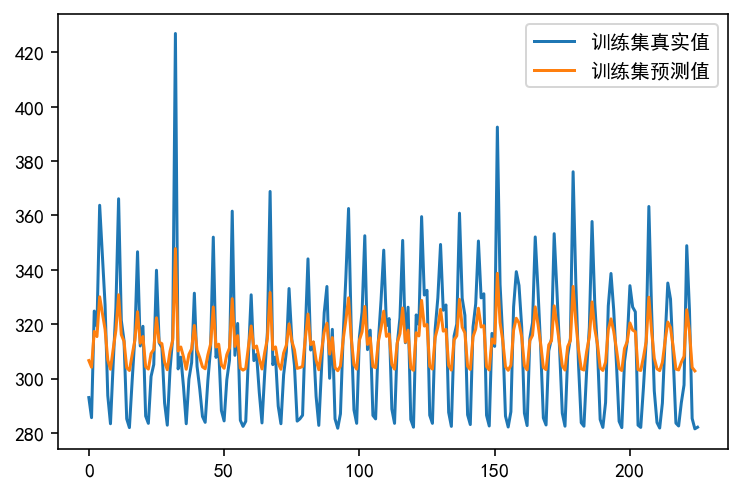

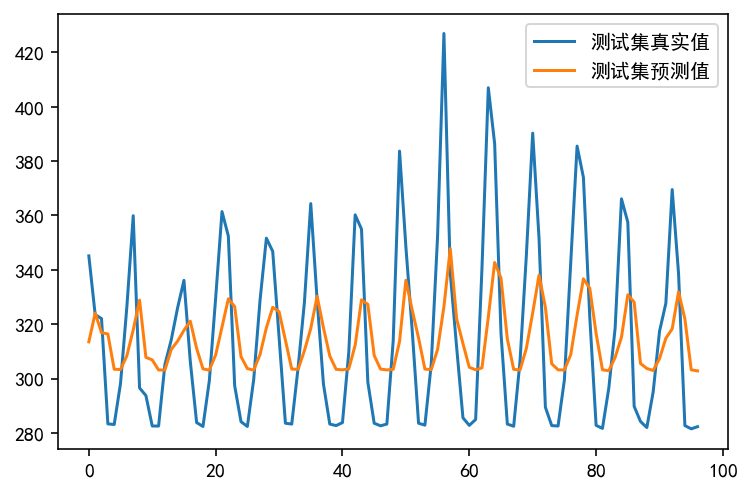

In [104]:
plt.plot(trainY,label='训练集真实值')
plt.plot(trainPredict[1:],label='训练集预测值')
plt.legend()
plt.show()
#plt.savefig('5.png',dpi=750,bbox_inches='tight')
plt.plot(testY,label='测试集真实值')
plt.plot(testPredict,label='测试集预测值')
plt.legend()
plt.show()
#plt.savefig('6.png',dpi=750,bbox_inches='tight')

In [105]:
testY1 = scaler.fit_transform(testY)
testPredict1=scaler.fit_transform(testPredict)

In [106]:
testPredict

array([[313.52768],
       [324.1061 ],
       [316.90717],
       [316.4252 ],
       [303.43915],
       [303.36078],
       [308.40942],
       [317.92313],
       [328.8795 ],
       [307.823  ],
       [306.8922 ],
       [303.178  ],
       [303.178  ],
       [310.73654],
       [313.7962 ],
       [317.76285],
       [321.13934],
       [311.11188],
       [303.59604],
       [303.12582],
       [308.70303],
       [318.96326],
       [329.35782],
       [326.48657],
       [308.08945],
       [303.7007 ],
       [303.12582],
       [308.86325],
       [318.69684],
       [326.22958],
       [324.65253],
       [314.14523],
       [303.5176 ],
       [303.41302],
       [310.30777],
       [318.45688],
       [330.28378],
       [318.72348],
       [308.30273],
       [303.41302],
       [303.2302 ],
       [303.59604],
       [312.29254],
       [328.98035],
       [327.30594],
       [308.54285],
       [303.5176 ],
       [303.2041 ],
       [303.41302],
       [313.66196],


In [107]:
# calculate MSE 均方误差
mse=mean_squared_error(testY1,testPredict1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(testY1,testPredict1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(testY1,testPredict1)
# 平均绝对百分比误差
mape= np.mean(np.abs(testY[1,:]-testPredict[1,:])/testY[1,:])
#calculate R square
r_square=r2_score(testY,testPredict)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('平均绝对百分比误差MAPE: %.6f' % mape)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.053926
均方根误差RMSE: 0.232219
平均绝对误差MAE: 0.181393
平均绝对百分比误差MAPE: 0.001845
R_square: 0.243817


### 7、RMSProp优化

In [108]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [109]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='RMSProp')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

Epoch 1/100
226/226 - 11s - loss: 0.0356 - 11s/epoch - 47ms/step
Epoch 2/100
226/226 - 1s - loss: 0.0264 - 806ms/epoch - 4ms/step
Epoch 3/100
226/226 - 1s - loss: 0.0258 - 775ms/epoch - 3ms/step
Epoch 4/100
226/226 - 1s - loss: 0.0254 - 1s/epoch - 5ms/step
Epoch 5/100
226/226 - 1s - loss: 0.0253 - 1s/epoch - 6ms/step
Epoch 6/100
226/226 - 1s - loss: 0.0249 - 1s/epoch - 6ms/step
Epoch 7/100
226/226 - 1s - loss: 0.0247 - 1s/epoch - 6ms/step
Epoch 8/100
226/226 - 1s - loss: 0.0246 - 754ms/epoch - 3ms/step
Epoch 9/100
226/226 - 1s - loss: 0.0246 - 799ms/epoch - 4ms/step
Epoch 10/100
226/226 - 1s - loss: 0.0244 - 770ms/epoch - 3ms/step
Epoch 11/100
226/226 - 1s - loss: 0.0245 - 751ms/epoch - 3ms/step
Epoch 12/100
226/226 - 1s - loss: 0.0244 - 897ms/epoch - 4ms/step
Epoch 13/100
226/226 - 1s - loss: 0.0243 - 1s/epoch - 5ms/step
Epoch 14/100
226/226 - 2s - loss: 0.0244 - 2s/epoch - 8ms/step
Epoch 15/100
226/226 - 1s - loss: 0.0242 - 1s/epoch - 7ms/step
Epoch 16/100
226/226 - 2s - loss: 0.0243

In [110]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

4/4 [==============================] - 0s 4ms/step


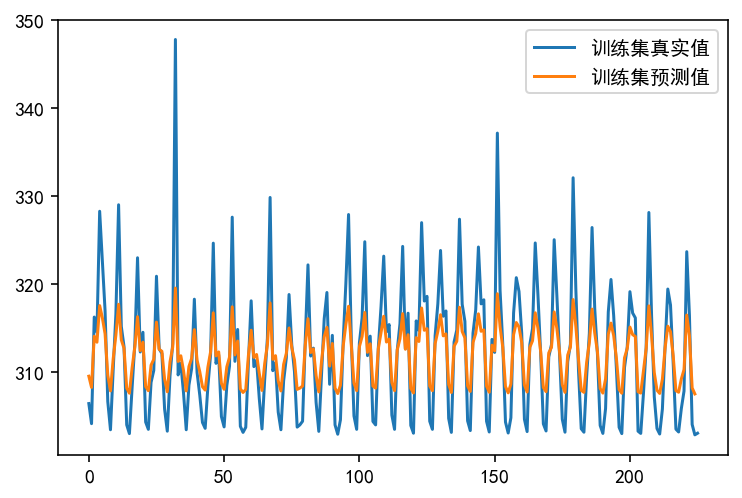

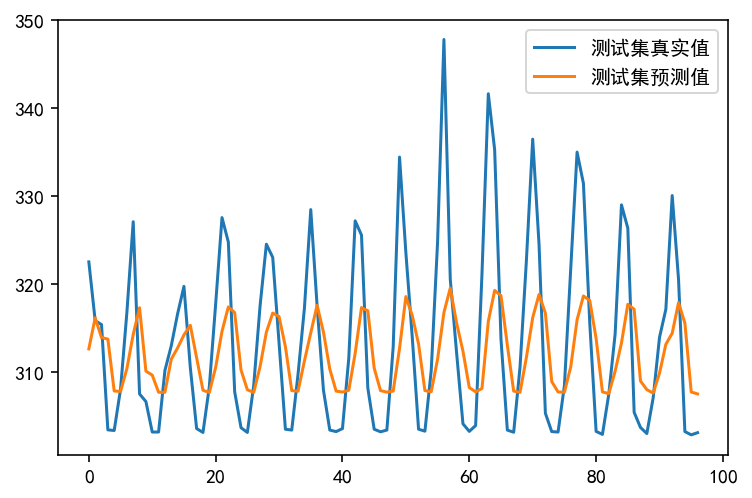

In [111]:
plt.plot(trainY,label='训练集真实值')
plt.plot(trainPredict[1:],label='训练集预测值')
plt.legend()
plt.show()
#plt.savefig('5.png',dpi=750,bbox_inches='tight')
plt.plot(testY,label='测试集真实值')
plt.plot(testPredict,label='测试集预测值')
plt.legend()
plt.show()
#plt.savefig('6.png',dpi=750,bbox_inches='tight')

In [112]:
testY1 = scaler.fit_transform(testY)
testPredict1=scaler.fit_transform(testPredict)

In [113]:
testPredict

array([[312.6163 ],
       [316.14334],
       [313.90073],
       [313.72693],
       [307.82437],
       [307.7813 ],
       [310.36917],
       [314.25705],
       [317.28836],
       [310.08774],
       [309.63077],
       [307.6806 ],
       [307.6806 ],
       [311.43695],
       [312.72403],
       [314.20175],
       [315.29745],
       [311.60193],
       [307.91028],
       [307.65173],
       [310.50818],
       [314.60794],
       [317.38907],
       [316.74667],
       [310.21622],
       [307.96738],
       [307.65173],
       [310.58353],
       [314.5194 ],
       [316.6847 ],
       [316.28766],
       [312.86258],
       [307.86737],
       [307.81003],
       [311.24606],
       [314.43887],
       [317.577  ],
       [314.5283 ],
       [310.31833],
       [307.81003],
       [307.7094 ],
       [307.91028],
       [312.10788],
       [317.30978],
       [316.93936],
       [310.4325 ],
       [307.86737],
       [307.695  ],
       [307.81003],
       [312.6703 ],


In [114]:
# calculate MSE 均方误差
mse=mean_squared_error(testY1,testPredict1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(testY1,testPredict1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(testY1,testPredict1)
# 平均绝对百分比误差
mape= np.mean(np.abs(testY1[1,:]-testPredict1[1,:])/testY1[1,:])
#calculate R square
r_square=r2_score(testY,testPredict)
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('平均绝对百分比误差MAPE: %.6f' % mape)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.095339
均方根误差RMSE: 0.308770
平均绝对误差MAE: 0.225091
平均绝对百分比误差MAPE: 1.489621
R_square: 0.262331


In [26]:
## 画在一起

In [25]:
# import numpy as np
# import pandas as pd
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error,r2_score
 
# def evaluation(testY, testPredict):
#     mae = mean_absolute_error(testY, testPredict)
#     mse = mean_squared_error(testY, testPredict)
#     rmse = np.sqrt(mean_squared_error(testY, testPredict))
#     mape=(abs(testPredict -testY)/testY).mean()
#     r_2=r2_score(testY, testPredict)
#     return mae, rmse, mape,r_2 ,mse

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# plt.rcParams ['font.sans-serif'] ='SimHei'               #显示中文
# plt.rcParams ['axes.unicode_minus']=False               #显示负号
 
 
# bar_width = 0.4
# fig, ax = plt.subplots(2,2,figsize=(8,5))
# for i,col in enumerate(df_eval.columns):
#     n=int(str('22')+str(i+1))
#     plt.subplot(n)
#     df_col=df_eval[col]
#     m =np.arange(len(df_col))
    
#     #hatch=['-','/','+','x'],
#     plt.bar(x=m,height=df_col.to_numpy(),width=bar_width,color=colors2)
    
#     #plt.xlabel('Methods',fontsize=12)
#     names=df_col.index
#     plt.xticks(range(0, 4),names,fontsize=14)
    
#     if col=='R2':
#         plt.ylabel(r'$R^{2}$',fontsize=14)
#     else:
#         plt.ylabel(col,fontsize=14)
# plt.tight_layout()
# plt.savefig('柱状图.jpg',dpi=512)
# plt.show()

## xgb模型


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
#画图前的文字、颜色等设置
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'  #显示中文
plt.rcParams['axes.unicode_minus'] = False  #显示负号
#plt.rcParams['figure.dpi'] = 200  # 图像分辨率
#plt.rcParams['text.color'] = 'black'  # 文字颜色
#plt.style.use('ggplot')
#print(plt.style.available)  # 可选的plt绘图风格

### 1、导入数据

In [39]:
#### 加载数据并进行统计描述
from pandas import read_csv
import pandas as pd
# 加载数据
df1 = read_csv(r'C:\Users\lmr18\Desktop\canada.csv',encoding='gbk')
df1['date'] = df1['date'].astype('datetime64[ns]')
df=df1[['date','总死亡']]

In [40]:
df1.head()

,date,Unnamed: 1,总确诊,日确诊,总死亡,日死亡,死亡率,疫苗总剂次,接种人数,疫苗剂次,新增接种人数
0,2022-04-01,NaN,3502380,12470,37666,69,0.005533,82236389,32581126,20000,1200
1,2022-04-02,NaN,3509394,7014,37699,33,0.004705,82265892,32582606,29503,1480
2,2022-04-03,NaN,3511975,2581,37716,17,0.006587,82295372,32583954,29480,1348
3,2022-04-04,NaN,3512535,560,37729,13,0.023214,82308457,32584569,13085,615
4,2022-04-05,NaN,3521439,8904,37772,43,0.004829,82331416,32585784,22959,1215


In [41]:
df.set_index('date',inplace=True)
df.head()

,总死亡
date,
2022-04-01,37666
2022-04-02,37699
2022-04-03,37716
2022-04-04,37729
2022-04-05,37772


In [42]:
df.dropna(axis=0, how='any', inplace=True)
#axis=0或axis='index’删除含有缺失值的行
#axis=1或axis='columns’删除含有缺失值的列
#how='all’时表示删除全是缺失值的行（列）
#how='any’时表示删除只要含有缺失值的行（列）
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2022-04-01 to 2023-02-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   总死亡     330 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [43]:
df.rename(columns={'date':'date', '总死亡':'confirmed'}, inplace = True)

In [44]:
%config InlineBackend.figure_format ='retina'
%matplotlib inline

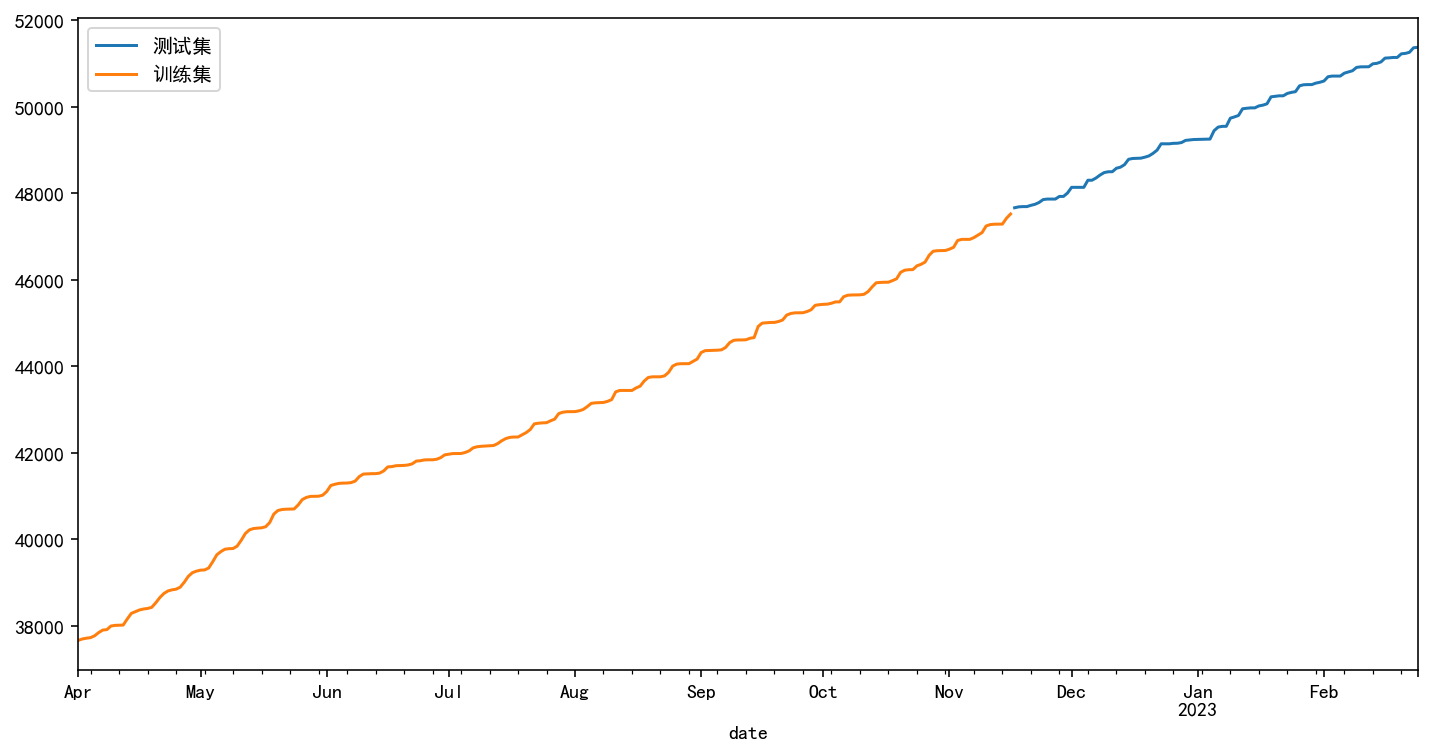

In [45]:
confirmed= df[['confirmed']]
split_date = '2022/11/16'
confirmed_train = confirmed.loc[confirmed.index <= split_date].copy()
confirmed_test = confirmed.loc[confirmed.index > split_date].copy()
_ = confirmed_test.rename(columns={'confirmed': '测试集'})\
    .join(confirmed_train.rename(columns={'confirmed': '训练集'}),how='outer')\
    .plot(figsize=(12,6), title='')

In [46]:
confirmed_train 

,confirmed
date,
2022-04-01,37666
2022-04-02,37699
2022-04-03,37716
2022-04-04,37729
2022-04-05,37772
...,...
2022-11-12,47281
2022-11-13,47282
2022-11-14,47284


In [47]:
confirmed_train_new = pd.DataFrame()
confirmed_train_new['date'] = confirmed_train.index
confirmed_train_new['confirmed'] = confirmed_train['confirmed'].values
confirmed_train_new

,date,confirmed
0,2022-04-01,37666
1,2022-04-02,37699
2,2022-04-03,37716
3,2022-04-04,37729
4,2022-04-05,37772
...,...,...
225,2022-11-12,47281
226,2022-11-13,47282
227,2022-11-14,47284
228,2022-11-15,47419


In [48]:
confirmed_test_new = pd.DataFrame()
confirmed_test_new['date'] = confirmed_test.index
confirmed_test_new['confirmed'] = confirmed_test['confirmed'].values
confirmed_test_new

,date,confirmed
0,2022-11-17,47661
1,2022-11-18,47682
2,2022-11-19,47688
3,2022-11-20,47688
4,2022-11-21,47717
...,...,...
95,2023-02-20,51218
96,2023-02-21,51228
97,2023-02-22,51253
98,2023-02-23,51358


### 2、引入特征

In [68]:
def create_features(df, label=None):
    print(len(df),len(df1))
    df['date'] = df['date']
    df['month'] = df['date'].dt.month
   # df['year'] = df['date'].dt.year
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofmonth'] = df['date'].dt.day
    df['dayofyear'] = df['date'].dt.dayofyear
   
    df['新增接种人数']=df1['新增接种人数']
    df['疫苗总剂次']=df1['疫苗总剂次']
    df['新增疫苗剂次']=df1['疫苗剂次']
    df['总接种人数']=df1['接种人数']
    
    X = df[['month','新增疫苗剂次','疫苗总剂次','总接种人数','新增接种人数','dayofweek',
           'dayofmonth','dayofyear']]
#      X = df[['month','新增疫苗剂次','新增接种人数','dayofweek',
#            'dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

X_train, y_train = create_features(confirmed_train_new,label='confirmed')
X_test, y_test = create_features(confirmed_test_new, label='confirmed')

230 330
100 330


In [69]:
X_test

,month,新增疫苗剂次,疫苗总剂次,总接种人数,新增接种人数,dayofweek,dayofmonth,dayofyear
0,11,20000,82236389,32581126,1200,3,17,321
1,11,29503,82265892,32582606,1480,4,18,322
2,11,29480,82295372,32583954,1348,5,19,323
3,11,13085,82308457,32584569,615,6,20,324
4,11,22959,82331416,32585784,1215,0,21,325
...,...,...,...,...,...,...,...,...
95,2,16889,86344188,32781754,779,0,20,51
96,2,44986,86389174,32784529,2775,1,21,52
97,2,104139,86493313,32787133,2604,2,22,53
98,2,18094,86511407,32787819,686,3,23,54


In [70]:
X_train

,month,新增疫苗剂次,疫苗总剂次,总接种人数,新增接种人数,dayofweek,dayofmonth,dayofyear
0,4,20000,82236389,32581126,1200,4,1,91
1,4,29503,82265892,32582606,1480,5,2,92
2,4,29480,82295372,32583954,1348,6,3,93
3,4,13085,82308457,32584569,615,0,4,94
4,4,22959,82331416,32585784,1215,1,5,95
...,...,...,...,...,...,...,...,...
225,11,37015,93770822,33930675,1,5,12,316
226,11,24703,93795525,33930676,1,6,13,317
227,11,11302,93806827,33947554,16878,0,14,318
228,11,164424,93971251,34072081,124527,1,15,319


### 3、训练模型

In [71]:
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

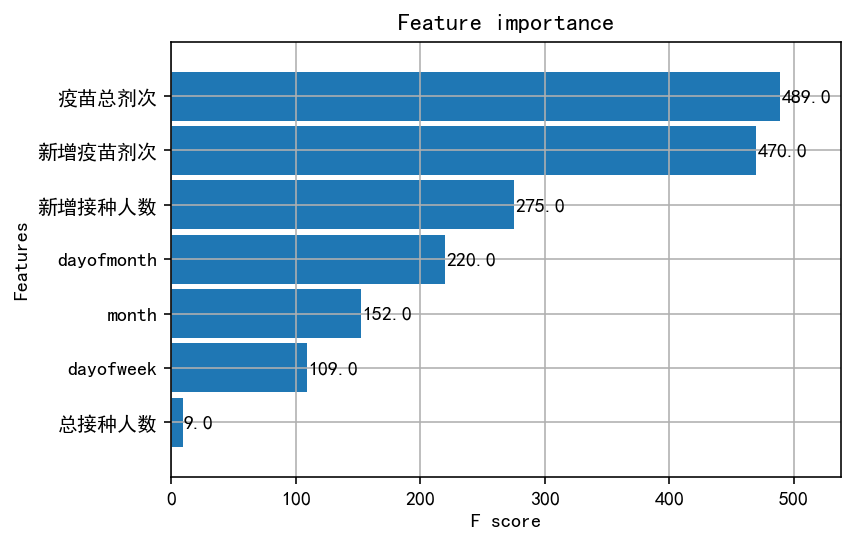

In [72]:
_ = xgb.plot_importance(reg, height=0.9)#特征重要性排序

In [73]:
X_test

,month,新增疫苗剂次,疫苗总剂次,总接种人数,新增接种人数,dayofweek,dayofmonth,dayofyear
0,11,20000,82236389,32581126,1200,3,17,321
1,11,29503,82265892,32582606,1480,4,18,322
2,11,29480,82295372,32583954,1348,5,19,323
3,11,13085,82308457,32584569,615,6,20,324
4,11,22959,82331416,32585784,1215,0,21,325
...,...,...,...,...,...,...,...,...
95,2,16889,86344188,32781754,779,0,20,51
96,2,44986,86389174,32784529,2775,1,21,52
97,2,104139,86493313,32787133,2604,2,22,53
98,2,18094,86511407,32787819,686,3,23,54


In [74]:
confirmed_test['Prediction'] = reg.predict(X_test)
#mse = mean_squared_error(y_true=confirmed_test['confirmed'], y_pred=confirmed_test['Prediction'])#均方误差（0：完美模型）
#mae = mean_absolute_error(y_true=confirmed_test['confirmed'], y_pred=confirmed_test['Prediction'])#平均绝对误差（0：完美模型）


In [75]:
confirmed_test['Prediction']

date
2022-11-17    38222.511719
2022-11-18    38227.460938
2022-11-19    38229.484375
2022-11-20    38212.820312
2022-11-21    38267.777344
                  ...     
2023-02-20    41965.398438
2023-02-21    41975.906250
2023-02-22    42043.164062
2023-02-23    42038.218750
2023-02-24    42018.976562
Name: Prediction, Length: 100, dtype: float32

### 4、拟合效果制图

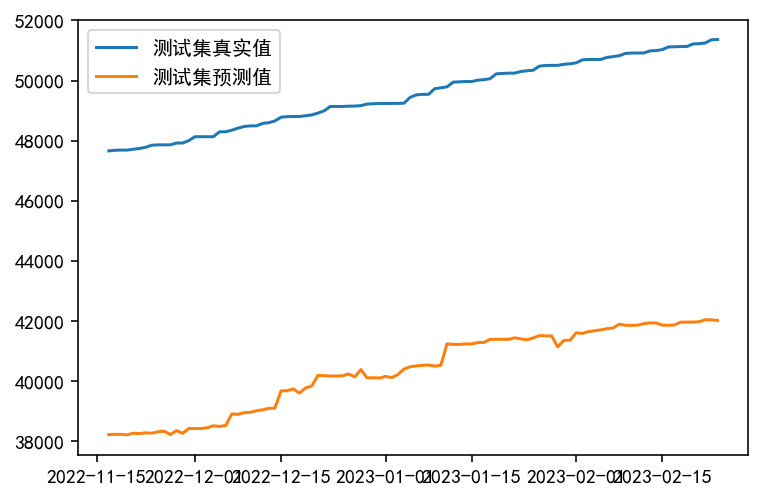

In [76]:
plt.plot(confirmed_test[['confirmed']],label='测试集真实值')
plt.plot(confirmed_test[['Prediction']],label='测试集预测值')
plt.legend()
plt.show()
#plt.savefig('6.png',dpi=750,bbox_inches='tight')

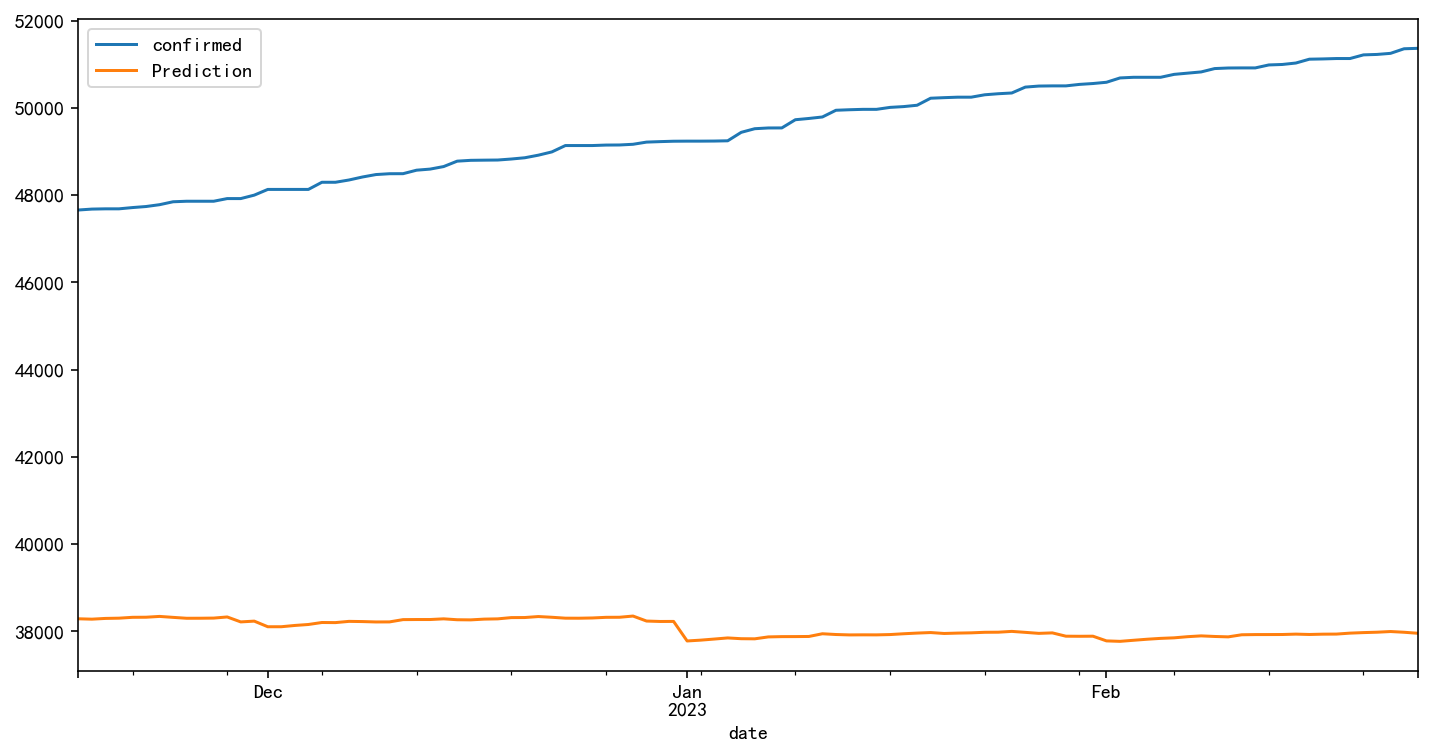

In [27]:
_ = confirmed_test[['confirmed','Prediction']].plot(figsize=(12, 6))

In [28]:
confirmed_test['Prediction'].to_csv('22.csv')

In [77]:
scaler = MinMaxScaler(feature_range=(0,1))
test1 = scaler.fit_transform(confirmed_test[['confirmed']])
fore1=scaler.fit_transform(confirmed_test[['Prediction']])

In [29]:
confirmed_test['error'] = confirmed_test['confirmed'] - confirmed_test['Prediction']
confirmed_test['abs_error'] = confirmed_test['error'].apply(np.abs)
error_by_day = confirmed_test.groupby(['month','dayofmonth']) \
    .mean()[['confirmed','Prediction','error','abs_error']]

KeyError: 'month'

In [ ]:
error_by_day.sort_values('abs_error', ascending=False).head(10)

### 5、模型评估

In [78]:
import math
from sklearn.metrics import r2_score

In [79]:
# calculate MSE 均方误差
mse=mean_squared_error(test1,fore1)
# calculate RMSE 均方根误差
rmse = math.sqrt(mean_squared_error(test1,fore1))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(test1,fore1)
#calculate R square
r_square=r2_score(confirmed_test[['confirmed']],confirmed_test[['Prediction']])
print('均方误差MSE: %.6f' % mse)
print('均方根误差RMSE: %.6f' % rmse)
print('平均绝对误差MAE: %.6f' % mae)
print('R_square: %.6f' % r_square)

均方误差MSE: 0.008336
均方根误差RMSE: 0.091302
平均绝对误差MAE: 0.076323
R_square: -64.150385


In [ ]:
confirmed_test[['Prediction']].to_csv('1.csv')#保存结果，方便熵权法使用